In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import pandas as pd

In [3]:
df_corpus = pd.read_csv('data/corpus/220620-CorpusArticles.csv')

In [4]:
set(df_corpus['site'].values)

{'fr.sott.net',
 'lemediaen442.fr',
 'lesdeqodeurs.fr',
 'lezarceleurs.blogspot.com',
 'theconversation.com',
 'www.breizh-info.com',
 'www.dreuz.info',
 'www.francesoir.fr',
 'www.francetvinfo.fr',
 'www.legorafi.fr',
 'www.lelibrepenseur.org',
 'www.profession-gendarme.com',
 'www.wikistrike.com'}

In [5]:
df_corpus['abstract']=df_corpus['abstract'].fillna('')

In [6]:
df_corpus['text']=df_corpus['title']+'\n'+df_corpus['abstract']+'\n'+df_corpus['article']

In [7]:
def is_covid(text):
    return 'covid' in text.lower()

In [8]:
df_corpus['covid']=df_corpus['text'].apply(is_covid)

In [25]:
df_covid = df_corpus[df_corpus['covid']].drop(['text','covid'],axis=1)

In [27]:
df_covid = df_covid.sample(frac=1)

In [30]:
df_covid.to_csv('data/corpus/220622-CorpusCovid.csv',index=False)

In [29]:
print(df_covid.iloc[7]['article'])

Ce Pass sanitaire qui nous sépare de ceux qu’on aime. C’est l’histoire tragique de cette dame qui ne peut plus voir sa mère âgée de 90 ans. Elle dit sa colère sur le réseau social Tik Tok :  « Je vais voir maman dans cet Ehpad [elle désigne l’établissement du doigt], j’ai essayé de rentrer mais je n’ai pas le Pass sanitaire donc je ne peux pas rentrer. Ma mère a 90 ans, je ne la reverrai peut être jamais. » Dans l’espoir de pouvoir échanger un simple coucou par la fenêtre entre fille et mère, elle recevra comme réponse de l’infirmière : « On verra quand j’aurai le temps. » Face à cette situation qui dépasse l’entendement, elle se résout à l’évidence et remarque une chose : « Quand on va voir quelqu’un en prison, on a le droit au parloir. Là, j’ai même pas le droit au parloir. » 

??? Une dame s'est vu refusé de voir sa maman dans un #ehpad par ce qu'elle n'a pas de #PassSanitaire.
Cette dame déclare « Je ne reverrai peut être jamais ma mère ! « . « Ceci est une prison « 
Voici où nous 

In [23]:
spacy_analyser = patat.ml.spacy_analyser.SpacyAnalyser()

In [24]:
print(df_corpus['text'][1234])

Riad Sattouf publie le septième volet des "Cahiers d'Esther" : "Chaque génération d'ados fait peur aux adultes"
Tous les jours, une personnalité s'invite dans le monde d'Élodie Suigo. Aujourd’hui, l’auteur de bandes dessinées et réalisateur, Riad Sattouf. Il publie "Les cahiers d'Esther. Histoires de mes 16 ans" aux Editions Allary.
Riad Sattouf est auteur de bandes dessinées et réalisateur, révélé et primé pour plusieurs de ses séries de bande dessinée comme Les Pauvres aventures de Jérémie ou encore Pascal Brutal. Même succès pour son premier long métrage en tant que scénariste et réalisateur, Les beaux gosses. Il est aussi l'auteur de la bande dessinée autobiographique, L'Arabe du futur, qui lui a valu une reconnaissance internationale. Il enfonce le clou avec son travail, pendant neuf ans, dans Charlie Hebdo avec La vie secrète des jeunes et dans L'Obs avec les fameux Cahiers d'Esther, les histoires vraies d'une jeune fille qu'il accompagne depuis ses dix ans, en racontant sa vie. 

In [25]:
import patat.ml.lex_analyser

In [26]:
lex = patat.ml.lex_analyser.LexAnalyser()

In [27]:
df_corpus[df_corpus['text'].isna()]

,url,title,abstract,article,date,author,tag,site,text


In [28]:
%%time
df_lex_corpus = lex.analyse_df(df_corpus,'text')

CPU times: user 11.4 s, sys: 65.5 ms, total: 11.5 s
Wall time: 11.5 s


In [16]:
df_lex_corpus['log_wc']

,index,url,title,article,date,author,tag,site,char_count,word_count,sent_count,mean_word,.,",",;,:,!,?,...
0,0,https://www.lelibrepenseur.org/le-professeur-d...,Le Pr Didier Raoult avait encore une fois rais...,"Le texte est clair, le service de vérification...",15 mai 2022,Par\nAdmin,"['in\nÀ la une, Santé']",www.lelibrepenseur.org,1660,265,7,5.249057,6,13,0,2,3,0,0
1,1,https://www.lelibrepenseur.org/des-clients-mec...,Des clients mécontents du Crédit Agricoule…\n\...,Et hop… l’année commence bien… Des clients des...,13 mars 2013,Par\nAdmin,"['in\nÀ la une, Eco & Finance, Veille Médias']",www.lelibrepenseur.org,1389,211,12,5.559242,11,12,0,3,0,1,0
2,2,https://www.lelibrepenseur.org/prostitution-et...,Prostitution et pédophilie industrielles au Ma...,Quelle misérable vie que d’en arriver là ! Pro...,5 août 2013,Par\nAdmin,"['in\nÀ la une, Dégénérescence, Salim Laïbi, V...",www.lelibrepenseur.org,799,116,4,5.853448,3,8,0,1,2,2,0
3,3,https://www.lelibrepenseur.org/pour-en-finir-a...,Pour en finir avec l’imposture Zéribi !\n\n\n\...,Voici une dernière vidéo de campagne pour en f...,7 juin 2012,Par\nuser,"['in\nÀ la une, Politique, Réseaux & Lobby']",www.lelibrepenseur.org,906,129,6,5.968992,5,7,1,2,1,0,0
4,4,https://www.lelibrepenseur.org/voici-la-preuve...,Voici la preuve que le Ministère de la santé a...,Cet article mensonger de Ouest-France va s’app...,13 mai 2022,Par\nAdmin,"['in\nÀ la une, Politique, Propaganda']",www.lelibrepenseur.org,4132,679,17,5.073638,16,37,0,4,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42067,42067,https://www.profession-gendarme.com/melun-le-f...,Melun : le fuyard finit sa course dans le port...,"Vue(s) :\n0\nMelun, ce jeudi matin. Le conduct...",NaN,NaN,['18 mai 2018 | \n\t\t\t\t\t\t\t\tCatégorie: F...,www.profession-gendarme.com,786,134,8,4.873134,7,13,0,2,0,0,0
42068,42068,https://www.profession-gendarme.com/karim-ou-t...,"Karim, ou Toufik, ou Karim Toufik ? Grande ved...",Vue(s) :\n6 630\n\nUn nouvel acteur dans le rô...,NaN,NaN,['28 décembre 2021 | \n\t\t\t\t\t\t\t\tCatégor...,www.profession-gendarme.com,1147,200,3,4.690000,2,7,0,6,3,2,0
42069,42069,https://www.profession-gendarme.com/seine-et-m...,Seine-et-Marne : Une intervention coordonnée d...,Vue(s) :\n9\n© Facebook Secours_Publics\nUn ho...,NaN,NaN,['30 août 2020 | \n\t\t\t\t\t\t\t\tCatégorie: ...,www.profession-gendarme.com,946,154,8,5.142857,7,4,0,1,0,0,0
42070,42070,https://www.profession-gendarme.com/marseille-...,Marseille: Trois faux policiers tentent de bra...,Vue(s) :\n0\n\nTrois hommes ont tenté de braqu...,NaN,NaN,['15 février 2019 | \n\t\t\t\t\t\t\t\tCatégori...,www.profession-gendarme.com,955,174,6,4.482759,5,14,0,3,0,0,0


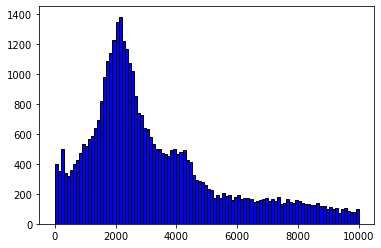

In [58]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df_lex_corpus['char_count'], color = 'blue', edgecolor = 'black',
          bins = 100, range=(0,10000))
plt.show()



In [61]:
df_lex_corpus[df_lex_corpus['char_count']<50]

,index,url,title,article,date,author,tag,site,char_count,word_count,sent_count,mean_word,.,",",;,:,!,?,...
36,36,https://www.lelibrepenseur.org/un-systeme-plus...,Un système plus grand : Une courte et excellen...,Articles similaires,17 janvier 2022,Par\nNbeh,"['in\nLLP Thèque, Traductions, Vidéos']",www.lelibrepenseur.org,19,2,1,9.000000,0,0,0,0,0,0,0
48,48,https://www.lelibrepenseur.org/ce-poeme-est-de...,Ce poème est dédié à l’Être-humain libre\nPuis...,Articles similaires,17 décembre 2021,Par\nNbeh,"['in\nLLP Thèque, Traductions, Vidéos']",www.lelibrepenseur.org,19,2,1,9.000000,0,0,0,0,0,0,0
274,274,https://www.lelibrepenseur.org/les-10-mercenai...,Les 10 Mercenaires\n\n\n\n Par\nAdmin \n\n20 o...,Articles similaires,20 octobre 2010,Par\nAdmin,['in\nPolitique'],www.lelibrepenseur.org,19,2,1,9.000000,0,0,0,0,0,0,0
278,278,https://www.lelibrepenseur.org/apres-avoir-ete...,"Après avoir été vacciné, un commandant de bord...",Articles similaires,23 février 2022,Par\nNbeh,"['in\nLLP Thèque, Traductions, Vidéos']",www.lelibrepenseur.org,19,2,1,9.000000,0,0,0,0,0,0,0
291,291,https://www.lelibrepenseur.org/chronologie-dun...,Chronologie d’un conflit d’intérêt\n\n\n\n Par...,Articles similaires,11 septembre 2010,Par\nAdmin,['in\nEco & Finance'],www.lelibrepenseur.org,19,2,1,9.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41785,41785,https://www.profession-gendarme.com/le-directe...,Le directeur d’une entreprise funéraire s’expr...,Vue(s) :\n2 058,NaN,NaN,['26 mars 2022 | \n\t\t\t\t\t\t\t\tCatégorie: ...,www.profession-gendarme.com,14,4,1,2.750000,0,0,0,1,0,0,0
41788,41788,https://www.profession-gendarme.com/un-jeune-f...,Un jeune français s’étonne des contrôles pass ...,Vue(s) :\n206\n\n\nSource : Youtube,NaN,NaN,['19 août 2021 | \n\t\t\t\t\t\t\t\tCatégorie: ...,www.profession-gendarme.com,31,6,1,4.000000,0,0,0,2,0,0,0
41803,41803,https://www.profession-gendarme.com/que-dites-...,Que dites vous de cela ?,Vue(s) :\n2 796\n\n\n\nInfo compte VK Silvano ...,NaN,NaN,['26 mai 2022 | \n\t\t\t\t\t\t\t\tCatégorie: A...,www.profession-gendarme.com,48,9,2,4.111111,1,0,0,1,0,0,0
41894,41894,https://www.profession-gendarme.com/prime-de-q...,Prime de qualification,Vue(s) :\n40\n\nDécision n°25772 du 17 avril 2019,NaN,NaN,['21 avril 2019 | \n\t\t\t\t\t\t\t\tCatégorie:...,www.profession-gendarme.com,46,9,1,4.111111,0,0,0,1,0,0,0


In [ ]:
# seaborn histogram
sns.distplot(df_lex_corpus['word_count'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nombre de mots')
plt.xlabel('Mots')
plt.ylabel('Articles')

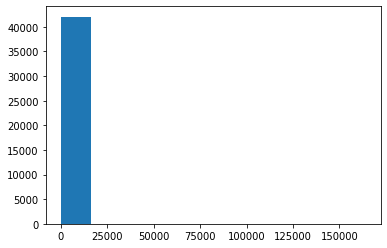

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(np.array(wc))
plt.show() 

In [31]:
x

array([172.23070672, 179.59380933, 157.32041569, 171.3321851 ,
       165.07597628, 170.67921393, 171.19687173, 168.73718013,
       173.97580239, 167.82725292, 183.49642539, 184.20620163,
       169.28710187, 163.62708188, 184.55142189, 181.08204817,
       170.37612856, 180.67344895, 182.97664053, 193.19510277,
       160.40260483, 190.5967846 , 184.70655039, 163.22957879,
       194.46831739, 159.61085616, 168.38172369, 175.66988466,
       150.89728663, 162.27977187, 176.38436645, 192.53070194,
       168.55565365, 173.97861289, 176.03497521, 175.9195374 ,
       168.12087517, 164.54842208, 166.6815187 , 154.65357423,
       181.8370763 , 167.81680057, 178.181152  , 173.77119768,
       169.93962783, 160.93972146, 166.90899593, 179.77725048,
       166.38996591, 147.08871601, 174.58094448, 182.26036934,
       169.01434829, 166.42120355, 191.88941711, 170.57081299,
       172.7366332 , 173.8699156 , 179.33134607, 184.1310768 ,
       166.07424319, 171.62385883, 178.22885794, 168.67